In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sobol_seq

import bvbq

In [3]:
def logprob(params):
    x1, x2 = params['x'][..., 0], params['x'][..., 1]
    res = -0.1*x1**4 -0.5*(2*x2-x1**2)**2
    return res

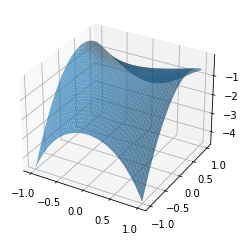

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
x = np.linspace(-1,1)
y = np.linspace(-1,1)
X,Y = np.meshgrid(x,y)
params = {'x': np.stack([X,Y],axis=-1)}
Z = logprob(params)
ax.plot_surface(X,Y,Z,alpha=0.7)

In [5]:
inferencer = bvbq.BVBQMixMVN(['x'], [2], [(None, None)])

In [34]:
ndata = 10
xdata = (4*(sobol_seq.i4_sobol_generate(2,ndata)-0.5)) #[-1,1] cube
params_init = {'x': xdata}
params_evals = logprob(params_init)
inferencer.initialize_data(params_init,params_evals,kind='sqe')
inferencer.initialize_components(mean=torch.zeros(2),var=20*torch.ones(2))
inferencer.optimize_gp_params()

{'raw_theta': tensor(58.1993), 'raw_lengthscale': tensor([0.6302, 1.8733])}

In [35]:
ys = []
for i in range(10):
    params, y = inferencer.new_evaluation_point() #Choose evaluation point
    evals = logprob(params) #Evaluation is on the user
    inferencer.insert_new_evaluations(params,evals) #Insert evaluation
    ys.append(y)

If tensor has more than 2 dimensions, only diagonal of covariance is returned


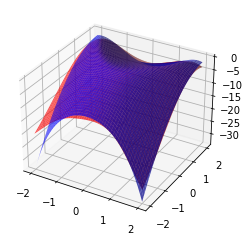

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
x = np.linspace(-2,2)
y = np.linspace(-2,2)
X,Y = np.meshgrid(x,y)
params = {'x': np.stack([X,Y],axis=-1)}
Z = logprob(params)
ax.plot_surface(X,Y,(Z),alpha=0.7,color='blue')
Z2 = inferencer.surrogate_prediction(params).numpy()
ax.plot_surface(X,Y,Z2,alpha=0.7,color='red')

In [37]:
#Make 10 boosts
for i in range(30):
    inferencer.update_distribution()

If tensor has more than 2 dimensions, only diagonal of covariance is returned


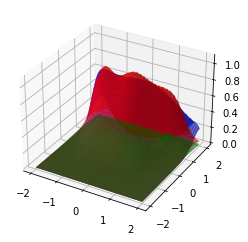

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
x = np.linspace(-2,2)
y = np.linspace(-2,2)
X,Y = np.meshgrid(x,y)
params = {'x': np.stack([X,Y],axis=-1)}
Z = logprob(params)
ax.plot_surface(X,Y,np.exp(Z),alpha=0.7,color='blue')
Z2 = inferencer.surrogate_prediction(params).numpy()
ax.plot_surface(X,Y,np.exp(Z2),alpha=0.7,color='red')

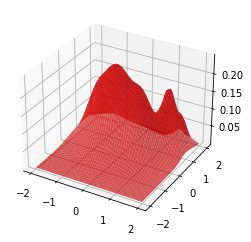

In [50]:
Z3 = inferencer.distribution.logprob(params)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,np.exp(Z3),alpha=0.7,color='red')

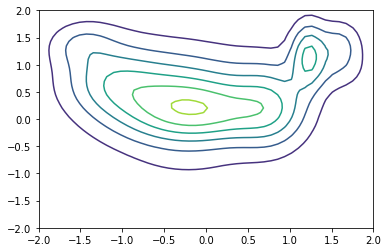

In [56]:
plt.contour(X, Y, np.exp(Z3))

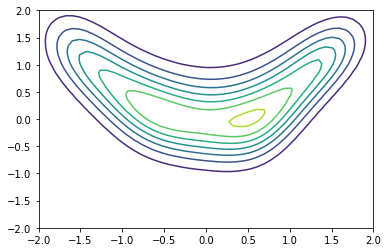

In [55]:
plt.contour(X, Y, np.exp(Z2))